In [1]:
print("14 Akash Choudhary")

# Import necessary libraries and modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Function to plot decision boundary for SVM
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Load the iris dataset
iris = datasets.load_iris()

# Select petal length and petal width as features
X = iris["data"][:, (2, 3)]

# Select the target variable
y = iris["target"]

# Filter the dataset to include only setosa and versicolor classes
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Create an SVM Classifier model with a linear kernel and a regularization parameter C
svm_clf = SVC(kernel="linear", C=1.0)

# Train the SVM model
svm_clf.fit(X, y)

14 Akash Choudhary


SVC(kernel='linear')

In [2]:
print("14 Akash Choudhary")

# Make a prediction using the trained model
svm_clf.predict([[2.4, 3.1]])

14 Akash Choudhary


array([1])

14 Akash Choudhary


(-2.0, 2.0, -2.0, 2.0)

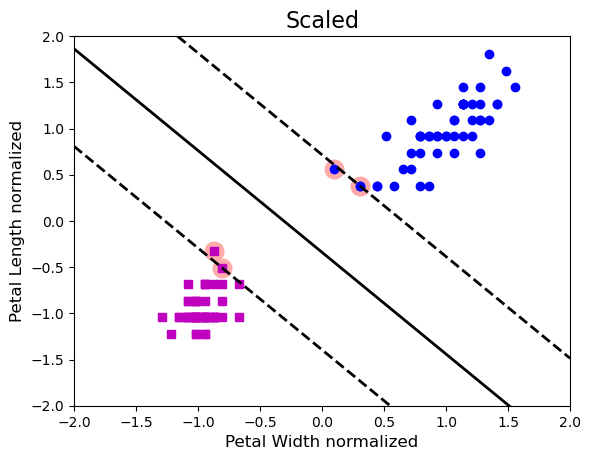

In [3]:
print("14 Akash Choudhary")

# Create a StandardScaler instance and scale the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the SVM classifier to the scaled data
svm_clf.fit(X_scaled, y)

# Plot the data points for each class
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")

# Plot the decision boundary of the SVM classifier
plot_svc_decision_boundary(svm_clf, -2, 2)

# Set labels and title for the plot
plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)

# Set the axis limits for the plot
plt.axis([-2, 2, -2, 2])

14 Akash Choudhary


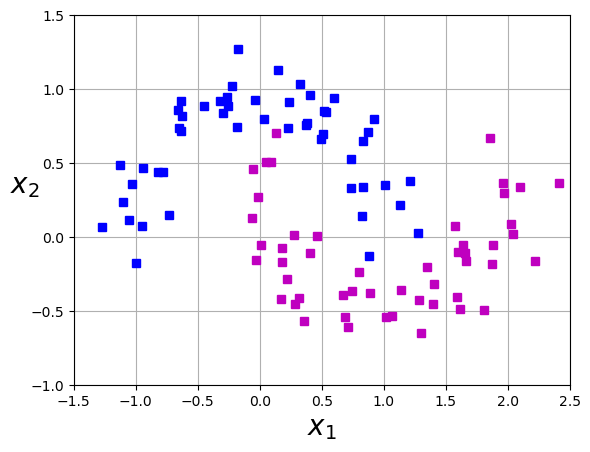

In [4]:
print("14 Akash Choudhary")

# Import necessary libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVC

# Generate synthetic dataset of two interleaving half circles
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")  # Plot samples with label 0 as blue squares
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")  # Plot samples with label 1 as magenta squares
    plt.axis(axes)  # Set the axis limits for the plot
    plt.grid(True, which='both')  # Enable grid on the plot
    plt.xlabel(r"$x_1$", fontsize=20)  # Set the label for the x-axis
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)  # Set the label for the y-axis with a specific rotation

# Plot the generated dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [5]:
print("14 Akash Choudhary")

# Define a function to plot the decision boundaries
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Create a pipeline to create features, scale data, and fit the model
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
))

# Fit the pipeline to the data
polynomial_svm_clf.fit(X, y)

14 Akash Choudhary


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scalar', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

14 Akash Choudhary


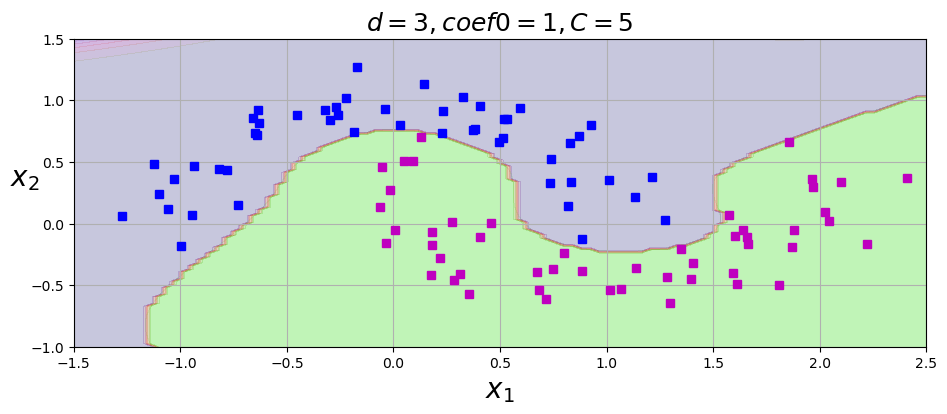

In [6]:
print("14 Akash Choudhary")

# Plot the decision boundaries and dataset
plt.figure(figsize=(11, 4))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, coef0=1, C=5$", fontsize=18)
plt.show()